Customer Conversion Prediction

Problem Statement:
You are working for a new-age insurance company and employe multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective ways to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build an ML model that will predict if a client will subscribe to the insurance.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")  
     

In [2]:
#Loading Dataset
df=pd.read_csv("Customer Conversion Prediction - Customer Conversion Prediction.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.rename(columns={'y':'target'},inplace=True)
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no


In [4]:
df.shape
print('From the above result no of rows are 45211 and no of columns are 11')

From the above result no of rows are 45211 and no of columns are 11


In [6]:
#finding the column name
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [7]:
#Basic statistical analysis of dataset
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [5]:
#checking for the data is balanced or not
df['target'].value_counts()

target
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

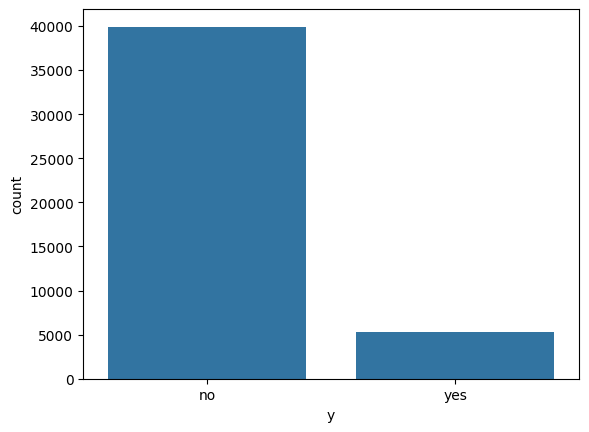

In [9]:
sns.countplot(x='y',data=df)

From the above result we can clearly understand that the dataset is imbalanced. Lets find the percentage.

In [6]:
#Finding the percentage of the data
print('Percentage for "no": ',((39922) / (39922+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39922+5289)) * 100 )
print('\n')
print('From the above result we can clearly understand that the percentage for "no" is very high so the Majority class "no" with 88.29% and Minority class  "yes" with 11.7%.')

Percentage for "no":  88.30151954170445
Percentage for "yes":  11.698480458295547


From the above result we can clearly understand that the percentage for "no" is very high so the Majority class "no" with 88.29% and Minority class  "yes" with 11.7%.


Data Preprocessing & Data Cleaning

In [20]:
#cheking missing values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [22]:
#Checking Data types
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

Unique Values of the Columns

In [15]:
#job
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [35]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [21]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [36]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [26]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [38]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [39]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [40]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [61]:
df['target'].unique()

array(['no', 'yes'], dtype=object)

#Exploring the Dataset and replace the unknown values
#Converting categorical Target column into numerical column.

In [6]:
df['target']=df['target'].replace({'no':0,'yes':1})

In [65]:
#removing unknown
df.job.value_counts()


job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [7]:
## droping the column unknown 
#outof 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to delete
df['job']=df['job'].replace({'unknown':np.nan})
df.job.isnull().sum()

288

In [8]:
df=df.dropna(subset=['job'])
df.job.isnull().sum()

0

In [9]:
#education_qual
df['education_qual'].value_counts()


education_qual
secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: count, dtype: int64

In [10]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((1730) / (23131+13262+6800+1730)) * 100 )

Percentage for "Unknown":  3.8510339914965606


In [11]:
#comparing to the overall data 3.8% of uknown values to romeved s not an isssue
df['education_qual']=df['education_qual'].replace({'unknown':np.nan})
df['education_qual'].isnull().sum()
df=df.dropna(subset=['education_qual'])

In [12]:
#call type
df['call_type'].value_counts()

call_type
cellular     28213
unknown      12286
telephone     2694
Name: count, dtype: int64

In [13]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((12286) / (28213+12286+2694)) * 100 )

Percentage for "Unknown":  28.44442386497812


In [ ]:
#Here the unknown value is 28% so removing this much data is affecting our model

In [83]:
df['prev_outcome'].value_counts()
#here unknown vaolue is too high like 80% of the data in this columns are unknown value so keep it..

prev_outcome
unknown    35286
failure     4709
other       1774
success     1424
Name: count, dtype: int64

Outlier Deduction and Correction

<Axes: xlabel='age'>

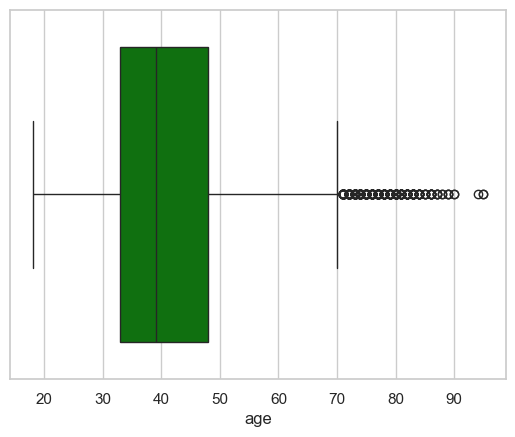

In [14]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style='whitegrid')
sns.boxplot(x=df.age,color='green')


In [15]:
#detecting Outlier for Age column

def remove_outlayer(df,column):
     q1, q3 = np.percentile(df[column], [25, 75])
     IQR = q3 - q1
     lower_bound = q1 - 1.5 * IQR
     upper_bound = q3 + 1.5 * IQR
     df[column] = df[column].clip(lower_bound,upper_bound)
    
     return lower_bound, upper_bound
    

<Axes: xlabel='age'>

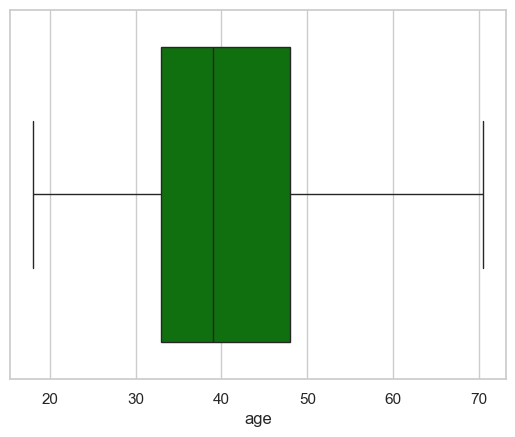

In [16]:
#Removing outlier for Age
remove_outlayer(df,'age')
sns.set(style='whitegrid')
sns.boxplot(x=df.age,color='green')


<Axes: xlabel='day'>

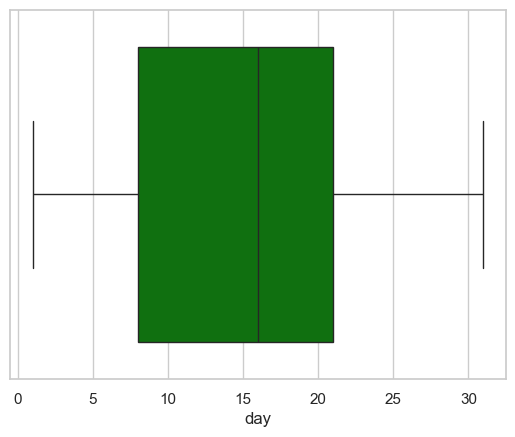

In [17]:
# checking out layers day column
sns.set(style='whitegrid')
sns.boxplot(x=df.day,color='green')


<Axes: xlabel='day'>

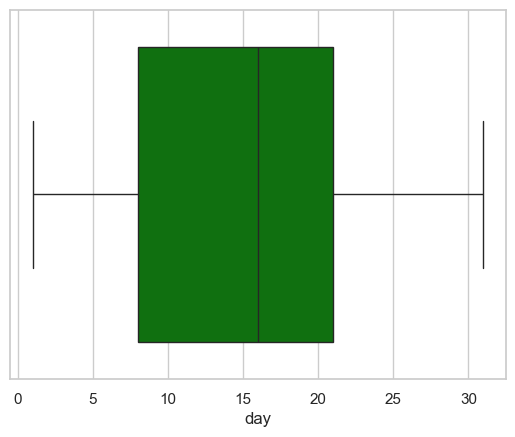

In [18]:
#To remove outlayers usinv the function
remove_outlayer(df,'day')
sns.set(style='whitegrid')
sns.boxplot(x=df.day,color='green')

<Axes: xlabel='num_calls'>

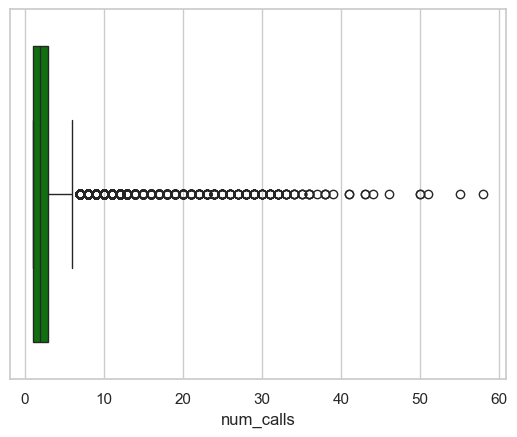

In [19]:
#No of Calls
sns.set(style='whitegrid')
sns.boxplot(x=df['num_calls'],color='green')

<Axes: xlabel='num_calls'>

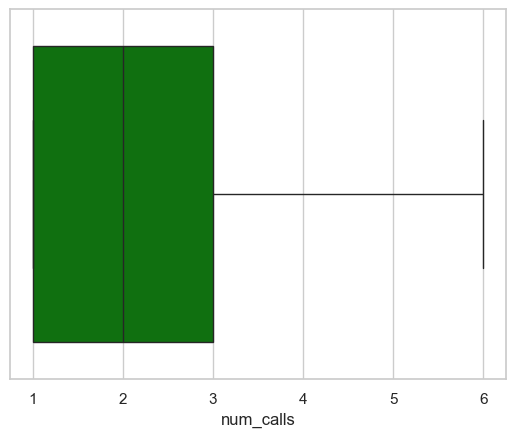

In [21]:
remove_outlayer(df,'num_calls')
sns.set(style='whitegrid')
sns.boxplot(x=df['num_calls'],color='green')

<Axes: xlabel='dur'>

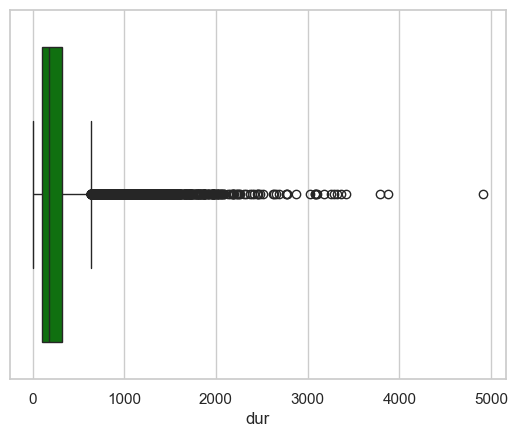

In [23]:
#duration column
sns.set(style='whitegrid')
sns.boxplot(x=df['dur'],color='green')

<Axes: xlabel='dur'>

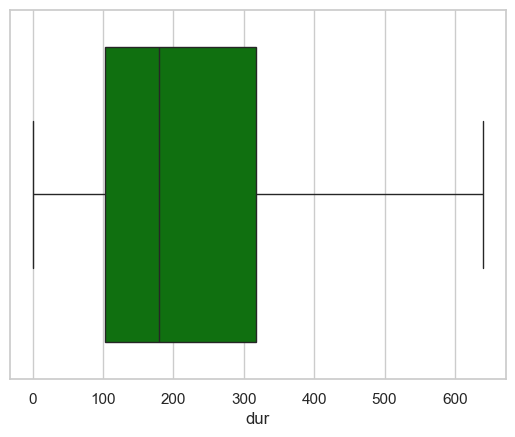

In [24]:
remove_outlayer(df,'dur')
sns.set(style='whitegrid')
sns.boxplot(x=df['dur'],color='green')


we detucted and removed outlier for all numerical columns. So we are done with Data Cleaning Process.

EDA - (Exploratory Data Analysis):
    EDA is an important step in the data analysis process, as it helps to identify potential issues with the data and to develop a deeper understanding of the relationships between variables.

Distribution of Feature and Target variable

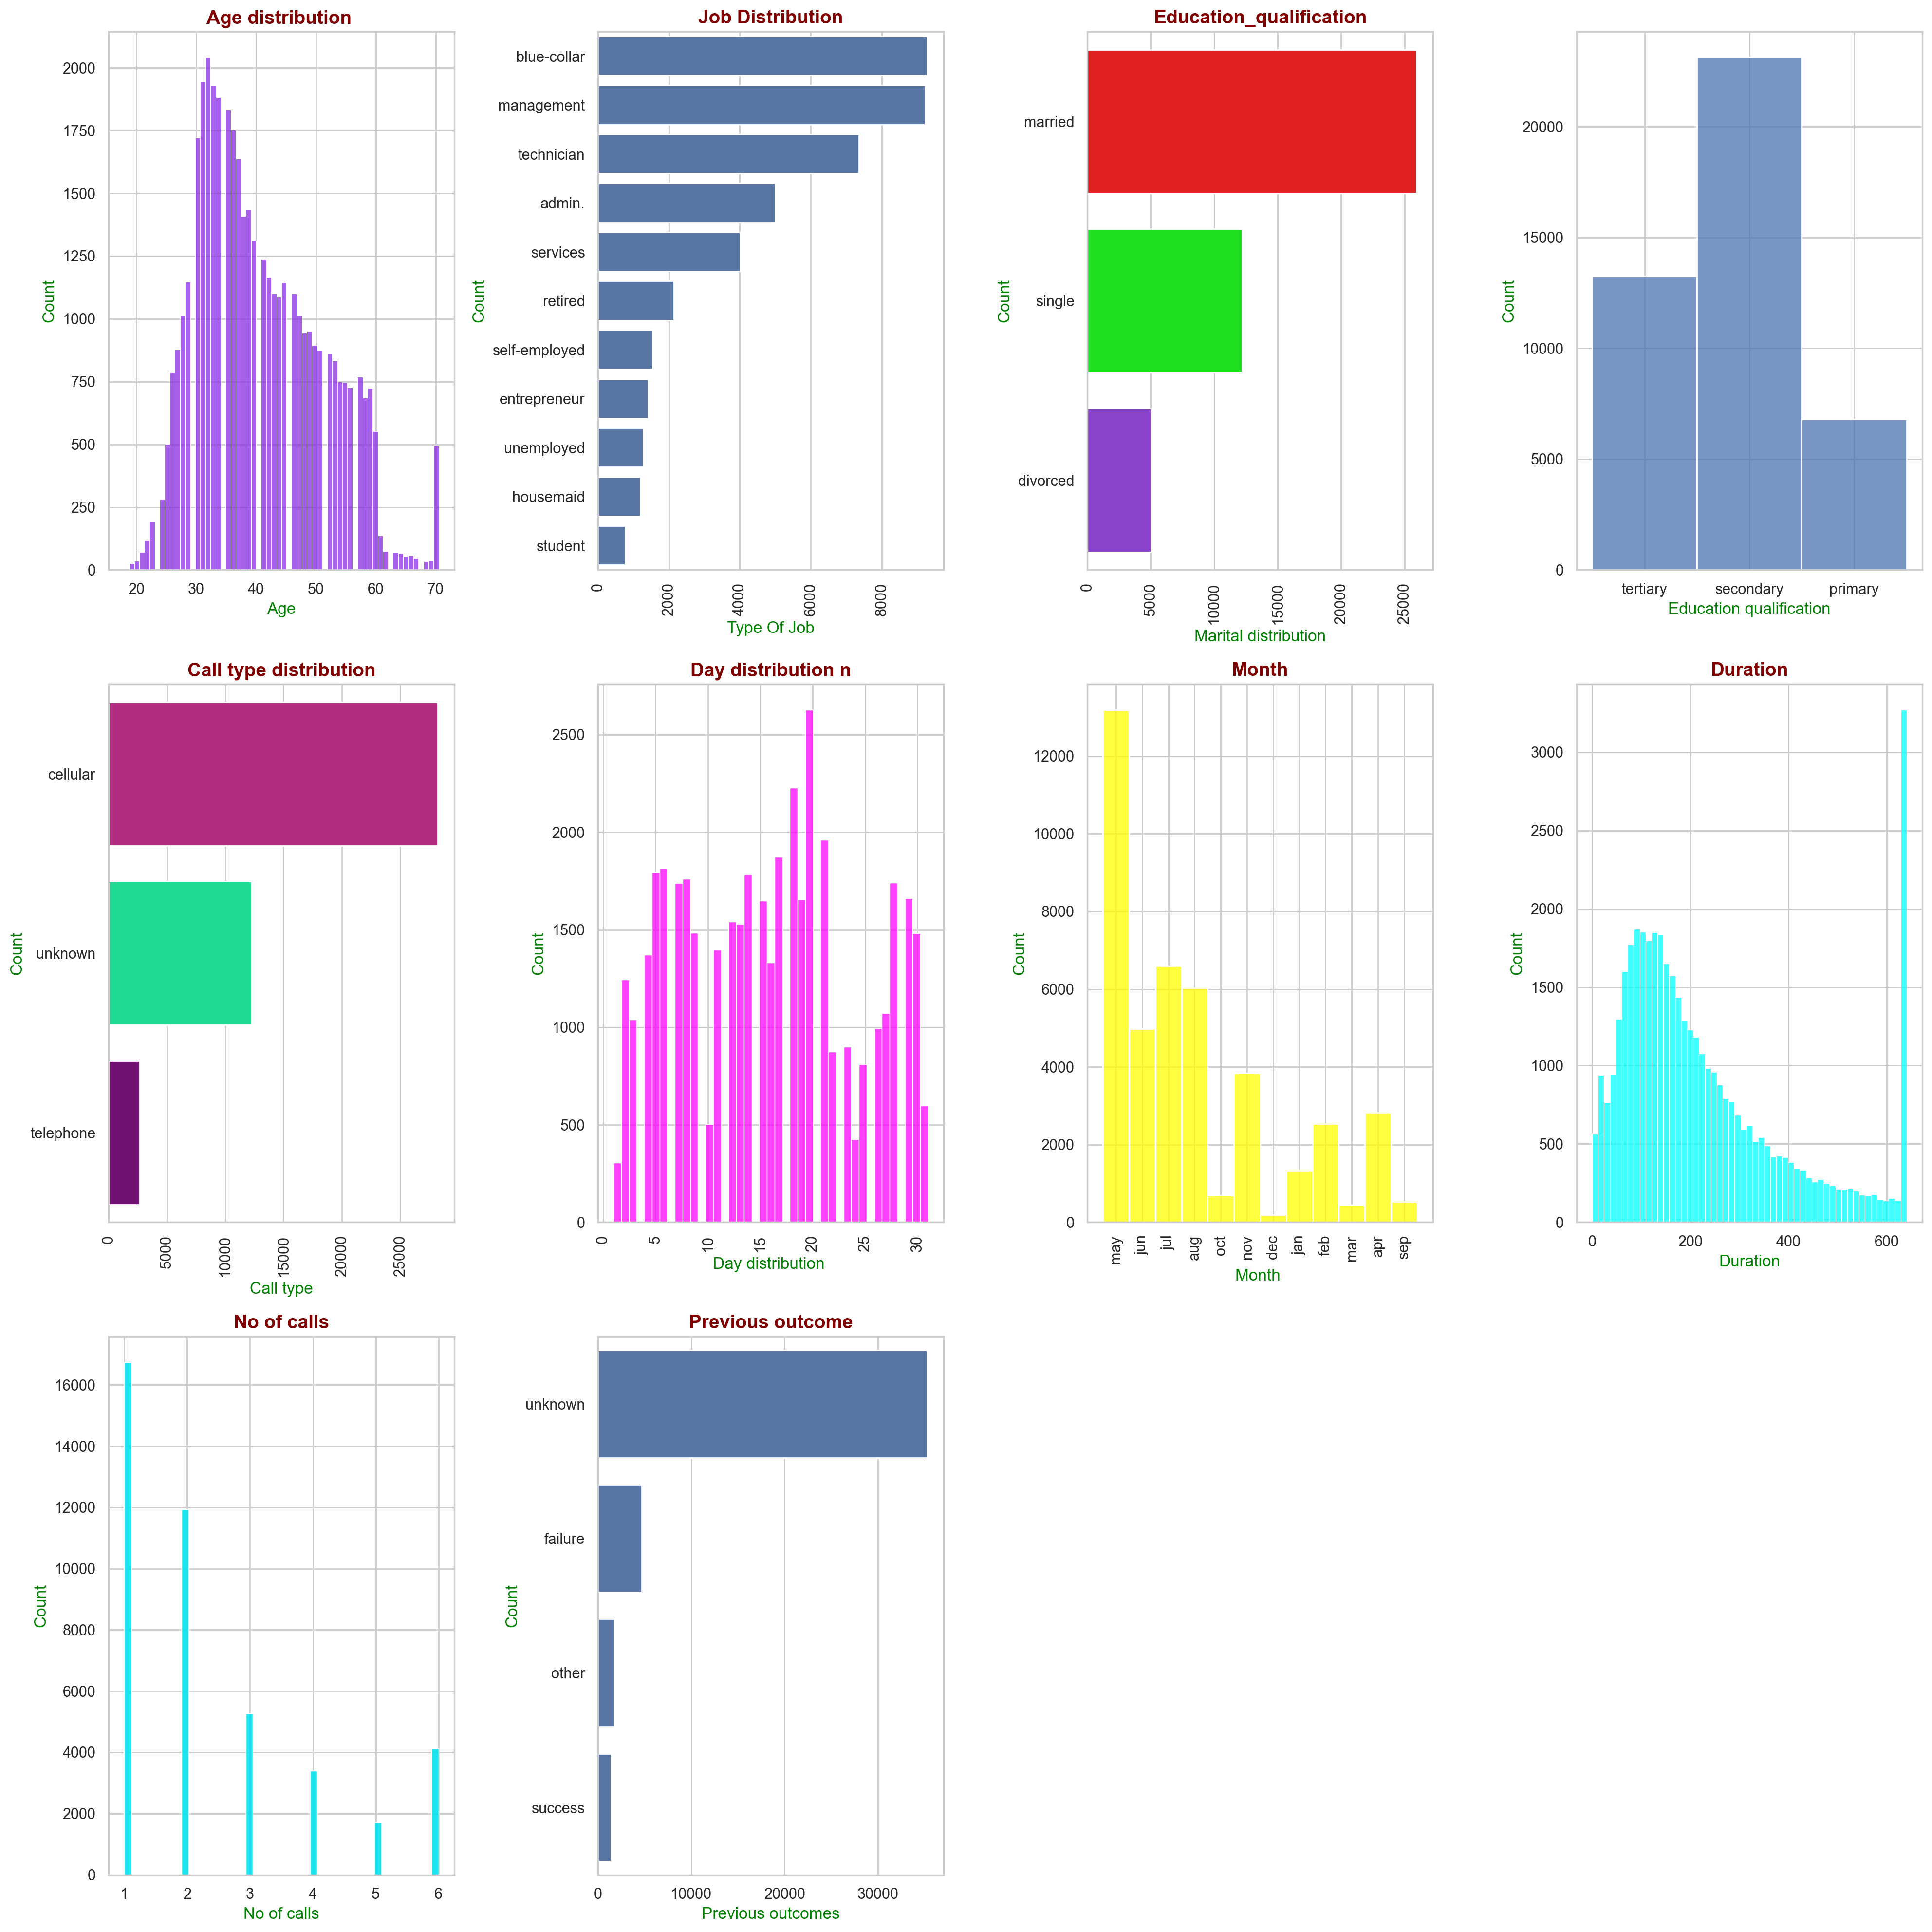

In [34]:
# Age distribution 
plt.figure(figsize = (20,20),dpi=200)  
plt.subplot(3,4,1) 
sns.histplot((df.age),color='BlueViolet')
plt.title('Age distribution ', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Age',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green')

#Job distribution   
plt.subplot(3,4,2)
sns.countplot(df['job'],order=df.job.value_counts().index)
plt.title('Job Distribution', fontsize = 14, color="maroon", fontweight='bold') 
plt.xlabel('Type Of Job',fontsize = 12, color='green') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='green')

# Marital distribution 
plt.subplot(3,4,3) 
custom_colors = {'married': 'red', 'divorced': 'BlueViolet', 'single': 'Lime'}
sns.countplot(df['marital'],order=df.marital.value_counts().index, palette=custom_colors) 
plt.title('Marital_distribution', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Marital distribution',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green')
plt.xticks(rotation = 90)


#education_qual
plt.title('Education_qualification',fontsize = 14, color='maroon', fontweight='bold') 
plt.subplot(3,4,4)
sns.histplot((df.education_qual))
plt.xlabel('Education qualification',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green')

# Call type distribution 
plt.subplot(3,4,5)
custom_colors = {'cellular': 'MediumVioletRed', 'telephone': 'purple', 'unknown' :'MediumSpringGreen'}
sns.countplot(df['call_type'],order=df.call_type.value_counts().index, palette=custom_colors) 
plt.title('Call type distribution',fontsize=14, color='maroon',fontweight='bold')
plt.xlabel('Call type',fontsize = 12, color='green') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='green') 


# Day distribution 
plt.subplot(3,4,6) 
sns.histplot(df['day'], color="Fuchsia") 
plt.title('Day distribution n',fontsize=14, color='maroon',fontweight='bold')
plt.xlabel('Day distribution ',fontsize = 12, color='green') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='green') 


plt.subplot(3,4,7) 
sns.histplot(df['mon'], color="yellow") 
plt.title('Month',fontsize=14, color='maroon',fontweight='bold')
plt.xlabel('Month ',fontsize = 12, color='green') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='green') 


# Dur distribution 
plt.subplot(3,4,8) 
sns.histplot((df.dur),color = 'cyan')
plt.title('Duration', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('Duration',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green') 

#no of calls
plt.subplot(3,4,9) 
sns.histplot(df['num_calls'])
sns.histplot((df.num_calls),color = 'cyan')
plt.title('No of calls', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('No of calls',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green') 


#prev_outcome
plt.subplot(3,4,10)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index)
plt.title('Previous outcome', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('Previous outcomes',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green') 


plt.tight_layout()


plt.show()

From the above plots we can clearly tell the following interpretation

1. Age
Most Target : 30 to 40 years
Least Target : belove 20 and above 60
2. Job
Most Target : blue-collar and management
Least Target : students and house maid
3. Marital Status
Most Target : Maried
Least Target : Divorced
4. Education
Most Target : Secondary
Least Target : Primary
5. Call Type
Most Target : cellular
Least Target : telephone
6. Day
Most Target : Mid of the month
Least Target : Beginning of Month
7. Month
Most Target : May
Least Target : December
8. Duration
Most Target : call last around 1750 second
Least Target : call last around 100 to 200 second
9. No of Calls
Most Target : most people contacted one time
Least Target : least people contacted 5 times
10. Previous Outcome
Most Target : most people previous outcome was unknown
Least Target : Previous outcome for least people are success
11. Target
No of people insured is very less percentage (ie) 88 %, only few percentage are insured.

Features vs Target
Categorical Variable vs Target (Categorical) -- Job, Marital, Educational Qualification, Call Type, Month

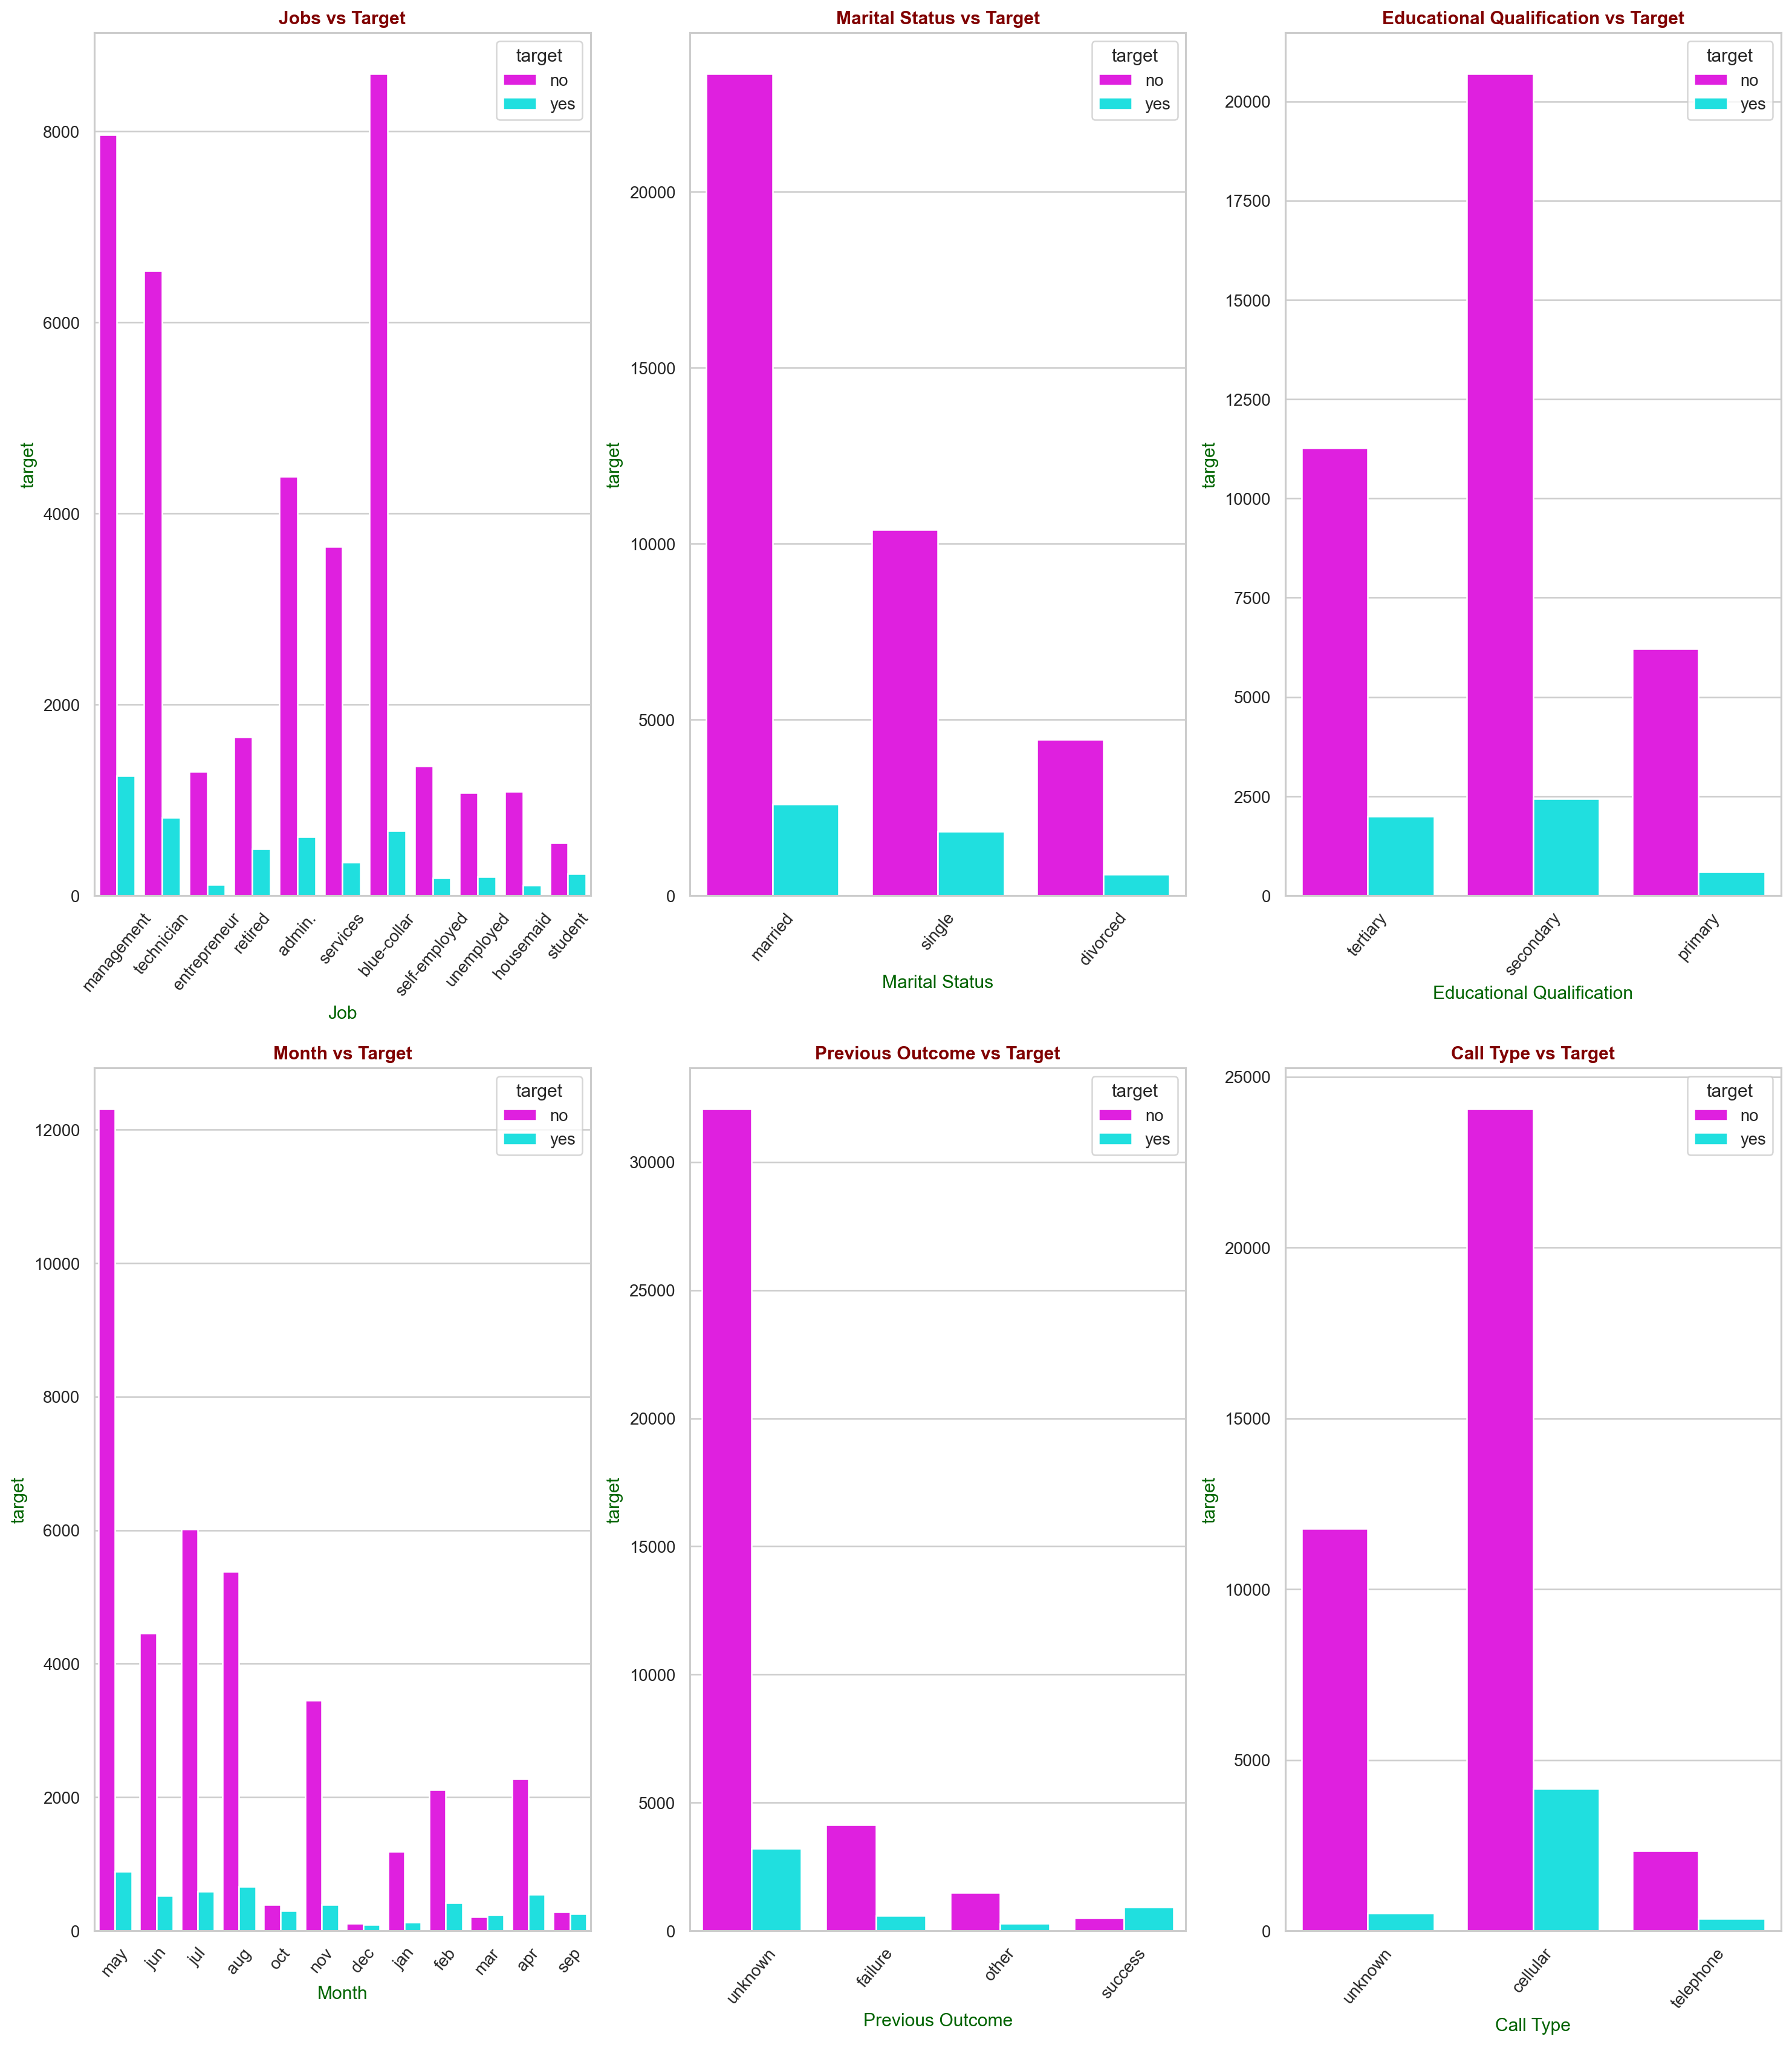

In [36]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='mon',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')

plt.show()

Numerical Variable vs Target -- Age, Day, Duration, No of Calls

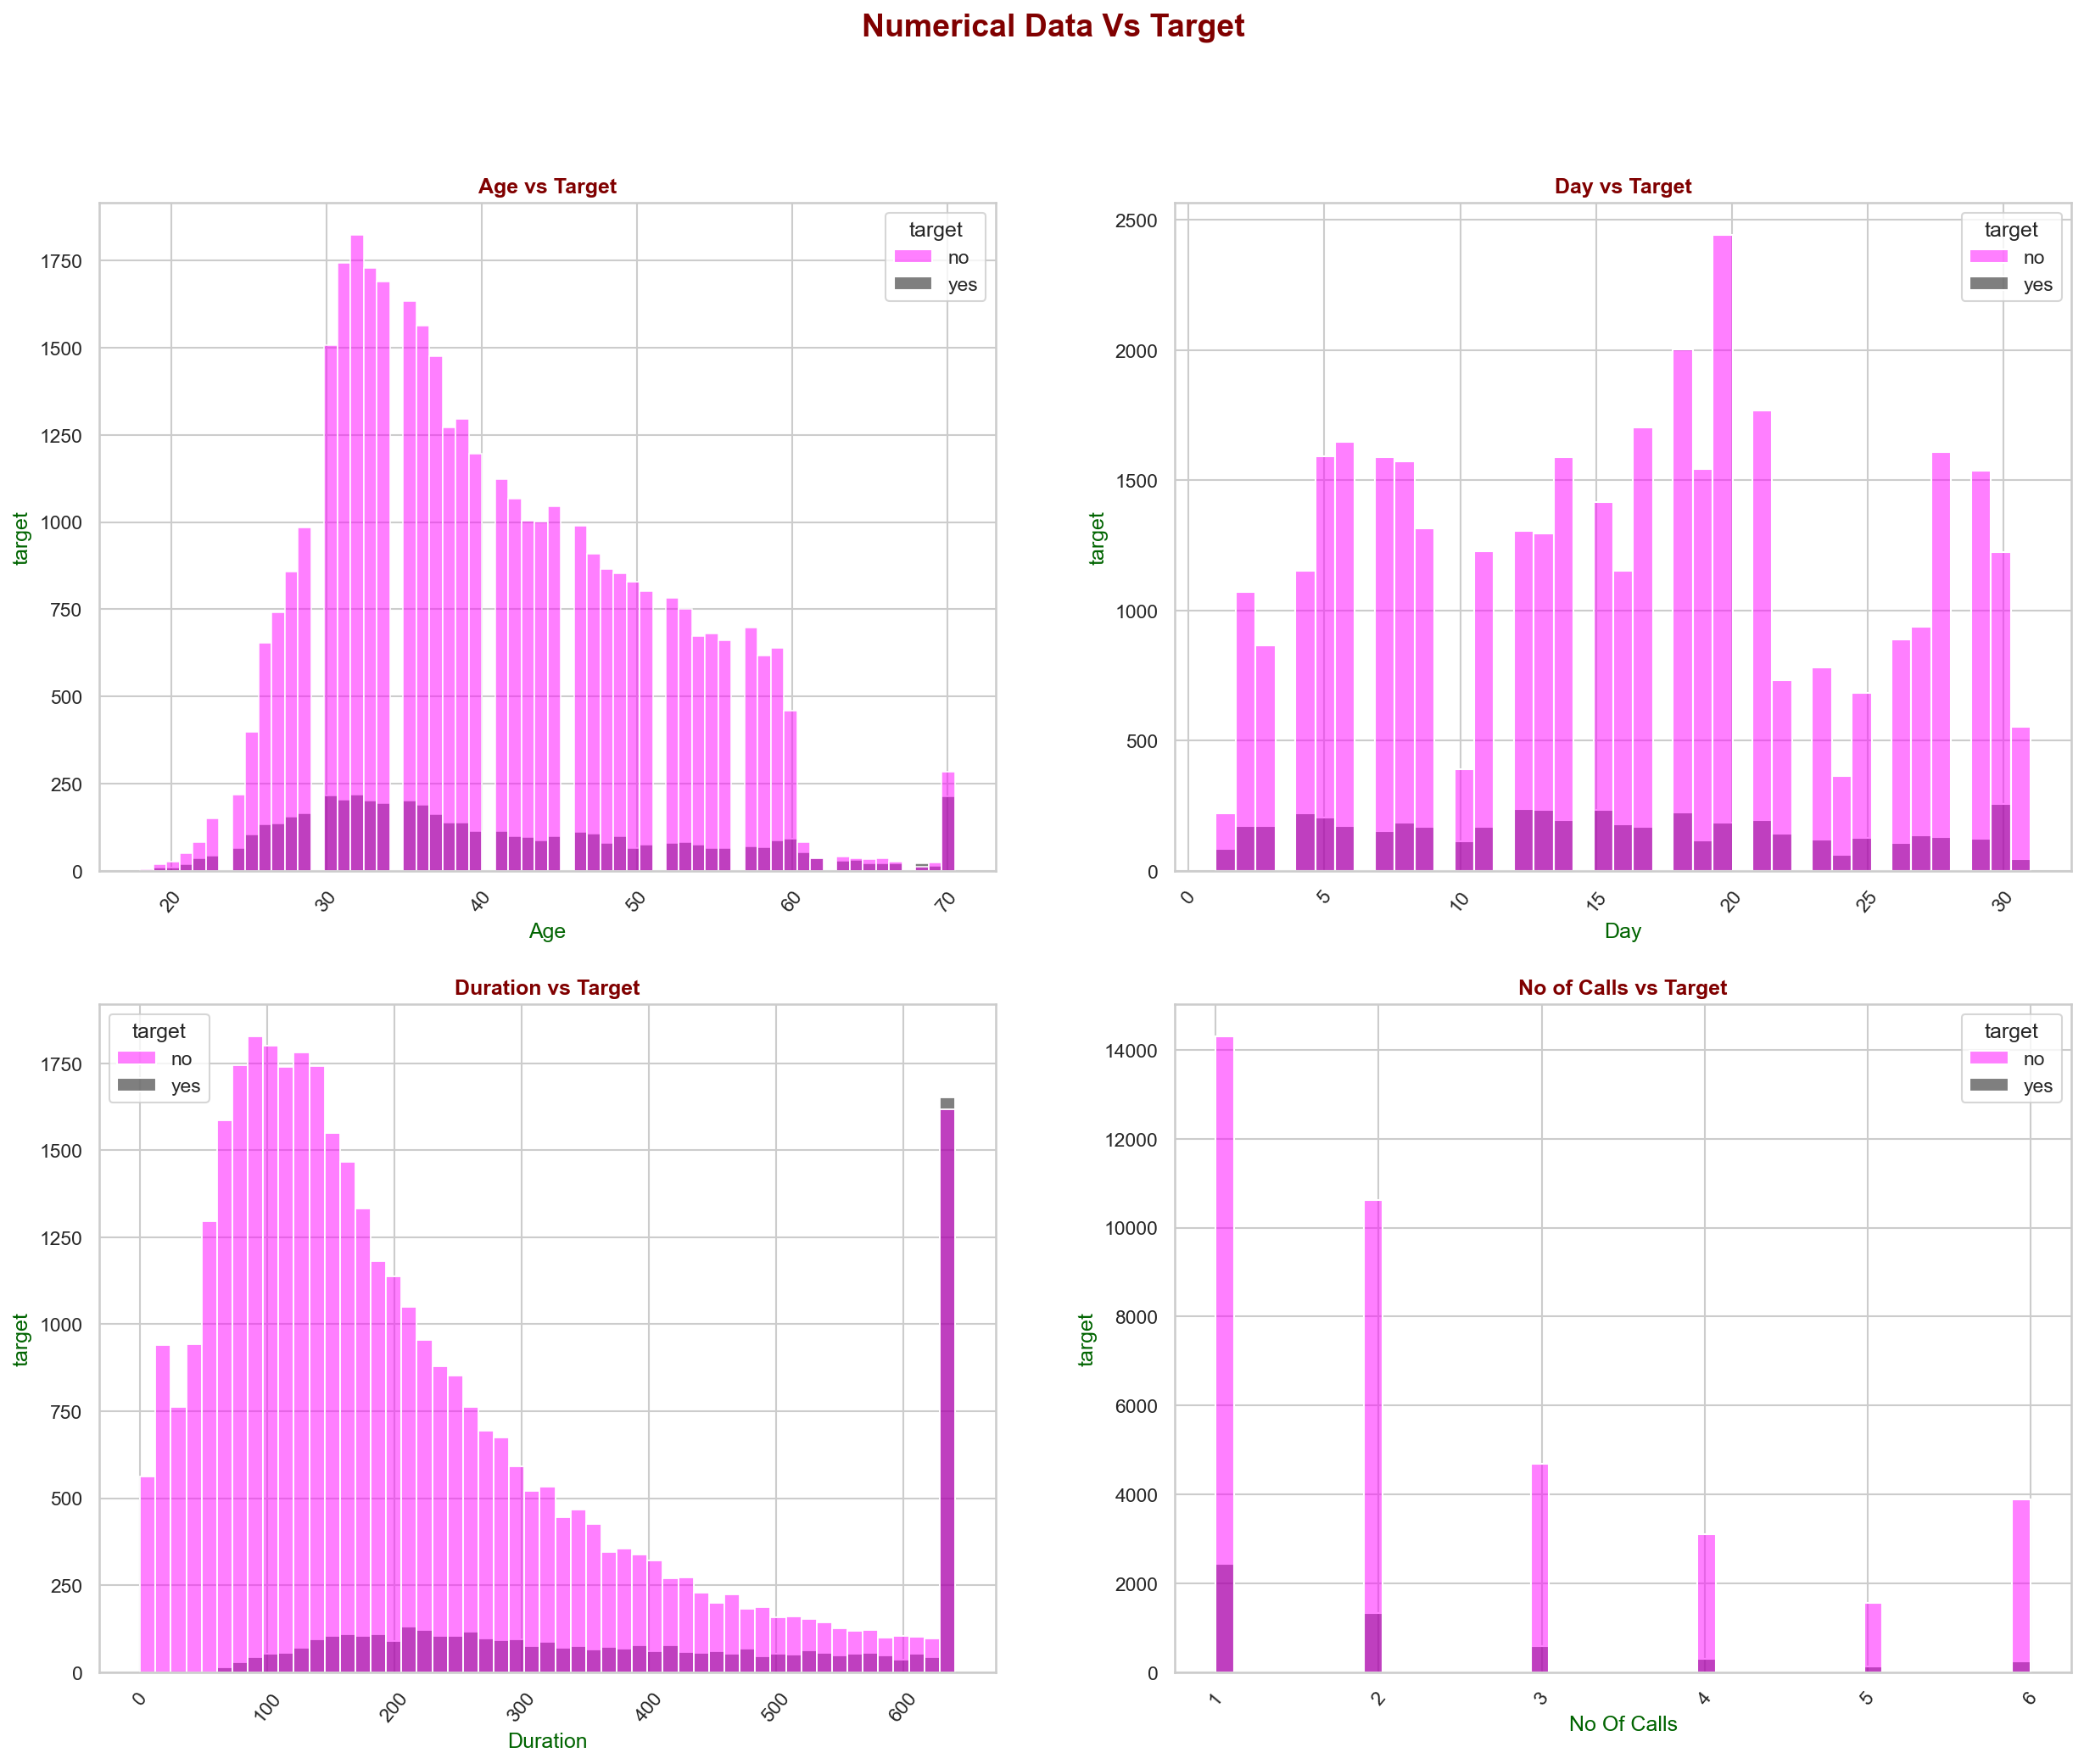

In [41]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot 
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'black']
sns.histplot(x='age',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'black']
sns.histplot(x='day',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'black']
sns.histplot(x='dur',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'black']
sns.histplot(x='num_calls',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('target', color='DarkGreen')

plt.show()


In [ ]:
Encoding

In [42]:
#Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})   
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1,unknown,no
1,44.0,5,single,secondary,unknown,5,may,151.0,1,unknown,no
2,33.0,2,married,secondary,unknown,5,may,76.0,1,unknown,no


In [43]:
#Encoding for Marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1,unknown,no
1,44.0,5,3,secondary,unknown,5,may,151.0,1,unknown,no
2,33.0,2,1,secondary,unknown,5,may,76.0,1,unknown,no


In [44]:
#encoding for educational qualification (Label Encoding)
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,8,1,3,unknown,5,may,261.0,1,unknown,no
1,44.0,5,3,2,unknown,5,may,151.0,1,unknown,no
2,33.0,2,1,2,unknown,5,may,76.0,1,unknown,no


In [45]:

# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,8,1,3,unknown,5,1,261.0,1,unknown,no
1,44.0,5,3,2,unknown,5,1,151.0,1,unknown,no
2,33.0,2,1,2,unknown,5,1,76.0,1,unknown,no


In [46]:

# Encoding for call type column (Label Encoding)
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(3)
     

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,8,1,3,1,5,1,261.0,1,unknown,no
1,44.0,5,3,2,1,5,1,151.0,1,unknown,no
2,33.0,2,1,2,1,5,1,76.0,1,unknown,no


In [47]:

# Encoding for previous outcome column (Label Encoding)
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(3)
     

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no
1,44.0,5,3,2,1,5,1,151.0,1,1,no
2,33.0,2,1,2,1,5,1,76.0,1,1,no


In [48]:
# Encoding for Target column (Label Encoding)
df['target']=df['target'].replace({'no':0,'yes':1})

In [53]:
#Feature and Target Selection
X=df.drop('target',axis=1)

In [55]:
y=df['target']

In [57]:
X=X.values
y=y.values

In [60]:
# splitting the data as train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42 )

In [68]:
x_train

array([[ 35. ,   6. ,   1. , ..., 640.5,   3. ,   1. ],
       [ 27. ,   7. ,   1. , ..., 143. ,   2. ,   2. ],
       [ 46. ,   6. ,   3. , ...,  40. ,   1. ,   1. ],
       ...,
       [ 46. ,   7. ,   2. , ..., 111. ,   1. ,   3. ],
       [ 35. ,   3. ,   1. , ..., 274. ,   2. ,   1. ],
       [ 28. ,   4. ,   1. , ...,  38. ,   1. ,   1. ]])

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()

In [66]:
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

Modeling

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

In [89]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict_proba(X_test_scaled)[:,1]
lr_score=lr.score(X_test_scaled,y_test)
log_reg_auroc =roc_auc_score(y_test,y_pred)

In [91]:
print('roc_auc_score for LogisticRegression', log_reg_auroc)


roc_auc_score for LogisticRegression 0.8923907866597769


K-Nearest Neighbour (KNN)

In [95]:
#KNeighborsClassifier

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    knn=KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    Cross_Value_Accuracy_score=np.mean(cross_val_score(knn,X_test_scaled,y_test,cv=10))
    print(f'k valu:{i} train score:{knn.score(X_test_scaled,y_test)},Cross Value Accuracy :{Cross_Value_Accuracy_score}')
    

k valu:1 train score:0.8762588262530385,Cross Value Accuracy :0.8795011480193983
k valu:2 train score:0.8921171431878689,Cross Value Accuracy :0.8907278657568345
k valu:3 train score:0.8901493228382915,Cross Value Accuracy :0.8865620037766619
k valu:4 train score:0.8962842921634449,Cross Value Accuracy :0.8916547304836702
k valu:5 train score:0.892927422155342,Cross Value Accuracy :0.8938546092442385
k valu:6 train score:0.8961685380252344,Cross Value Accuracy :0.8942011608943824
k valu:7 train score:0.8957055214723927,Cross Value Accuracy :0.8957060587528434
k valu:8 train score:0.8990623914804954,Cross Value Accuracy :0.8986001137290245
k valu:9 train score:0.8992938997569163,Cross Value Accuracy :0.8982531597356337
k valu:10 train score:0.9004514411390208,Cross Value Accuracy :0.8984842388738681
k valu:20 train score:0.8998726704479685,Cross Value Accuracy :0.8987153180121025
k valu:30 train score:0.8997569163097581,Cross Value Accuracy :0.897673114887773
k valu:40 train score:0.900

k=10 is a good cross validation accuracy of 0.898

In [101]:
#Evalution metrics AUROC 
y_pred=knn.predict_proba(X_test_scaled)[:,1]
knn_auro_score=roc_auc_score(y_test,y_pred)
print(f'AUROC SCORE for KNN:{knn_auro_score}')

AUROC SCORE for KNN:0.8995579100320559


RandomForestClassifier

In [108]:
#RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
    rf=RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")
    rf.fit(X_train_scaled,y_train)
    y_pred=rf.predict_proba(X_test_scaled)[:,1]
    rf_score=rf.score(X_test_scaled,y_test)
    validation=np.mean(cross_val_score(rf,X_test_scaled,y_test,cv=10))
    print("Depth  : ", depth, " rf_score : ", rf_score, " Cross val score : " ,np.mean(validation))

Depth  :  1  rf_score :  0.8864451904155574  Cross val score :  0.8864451901205956
Depth  :  2  rf_score :  0.8889917814561871  Cross val score :  0.8872556435346122
Depth  :  3  rf_score :  0.8917698807732376  Cross val score :  0.8911917675207072
Depth  :  4  rf_score :  0.8960527838870239  Cross val score :  0.8972106883824729
Depth  :  5  rf_score :  0.8996411621715477  Cross val score :  0.8997569846787691
Depth  :  6  rf_score :  0.9013774742447043  Cross val score :  0.9012617484228145
Depth  :  7  rf_score :  0.903924065285334  Cross val score :  0.9048505160722715
Depth  :  8  rf_score :  0.9089014932283829  Cross val score :  0.9056604330286253
Depth  :  9  rf_score :  0.9089014932283829  Cross val score :  0.9054289515471441
Depth  :  10  rf_score :  0.9080912142609098  Cross val score :  0.9060077893652634


In [112]:
RFC_auro_score=roc_auc_score(y_test,y_pred)
print(f'AUROC SCORE for RFC:{RFC_auro_score}')
print('Depth = 10 is the best cross valid score for Randomforest classifier:0.906') 

AUROC SCORE for RFC:0.9247224425217817
Depth = 10 is the best cross valid score for Randomforest classifier:0.906


In [124]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(X_train_scaled,y_train) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(X_train_scaled,y_train)," Cross-Val score : ",
        np.mean(cross_val_score(model, x_test, y_test, cv=10)))

Learning rate :  0.01  Train score :  0.8960178271690687  Cross-Val score :  0.8937379297025878
Learning rate :  0.02  Train score :  0.9061758407130868  Cross-Val score :  0.9040397944294236
Learning rate :  0.03  Train score :  0.9116166001041848  Cross-Val score :  0.905081595210506
Learning rate :  0.04  Train score :  0.9147710829426405  Cross-Val score :  0.9040393920861766
Learning rate :  0.05  Train score :  0.9160155119523066  Cross-Val score :  0.9054290856615597
Learning rate :  0.1  Train score :  0.9260577646582161  Cross-Val score :  0.9062395390755762
Learning rate :  0.11  Train score :  0.9275626555536262  Cross-Val score :  0.9056604330286253
Learning rate :  0.12  Train score :  0.9284019216299126  Cross-Val score :  0.9042718123685679
Learning rate :  0.13  Train score :  0.9296752908491057  Cross-Val score :  0.9043879554525557
Learning rate :  0.14  Train score :  0.9321641488684378  Cross-Val score :  0.9045028915068022
Learning rate :  0.15  Train score :  0.93

DecisionTreeClassifier

In [119]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(X_train_scaled,y_train) 
y_pred=dt.predict_proba(X_test_scaled)[:,1]
dt_score= dt.score(X_test_scaled,y_test) 
DT_auro_score = roc_auc_score(y_test, y_pred)
print(f'DecisionTreeClassifier score:{dt_score},AUROC SCORE for DecisionTreeClassifier{DT_auro_score}')

DecisionTreeClassifier score:0.9054288690820697,AUROC SCORE for DecisionTreeClassifier0.8437070465775832


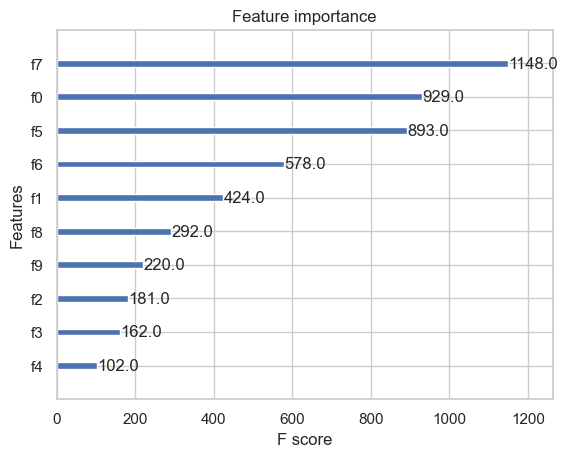

In [125]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()